In [7]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [20]:
import itertools
import warnings
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt

warnings.filterwarnings("ignore")

# El dataset de pasajeros aéreos es fundamental para entender conceptos clave en el análisis de series temporales, como ARIMA (Autoregressive Integrated Moving Average). Aplicar una transformación logarítmica a los datos y suavizarlos con un promedio móvil (moving average) ayuda a estabilizar la varianza y resaltar patrones significativos. Esto facilita la precisión en la predicción de tendencias y comportamientos estacionales

-------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------

In [11]:
# Importar la biblioteca pandas
import pandas as pd

# Cargar el dataset y utilizar la variable 'passengers'
passengers = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)

# Mostrar las primeras filas del dataset para verificar
print(passengers.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [14]:
# Cargar el dataset sin establecer el índice ni convertir a datetime
passengers = pd.read_csv('AirPassengers.csv')

# Convertir la columna 'Month' a datetime
passengers['Month'] = pd.to_datetime(passengers['Month'], infer_datetime_format=True)



In [15]:
# Establecer la columna 'Month' como índice
passengers.set_index('Month', inplace=True)

# Mostrar las primeras filas para verificar la conversión y el índice
print(passengers.head())



            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [16]:

# Mostrar información del DataFrame
print(passengers.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None


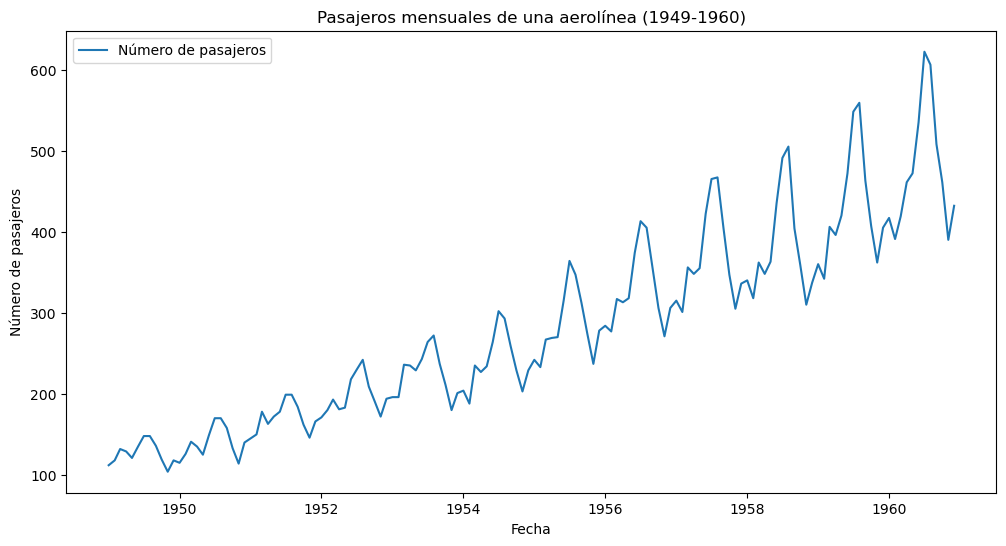

In [17]:

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Graficar la serie temporal
plt.plot(passengers, label='Número de pasajeros')

# Etiquetas y título del gráfico
plt.xlabel('Fecha')
plt.ylabel('Número de pasajeros')
plt.title('Pasajeros mensuales de una aerolínea (1949-1960)')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


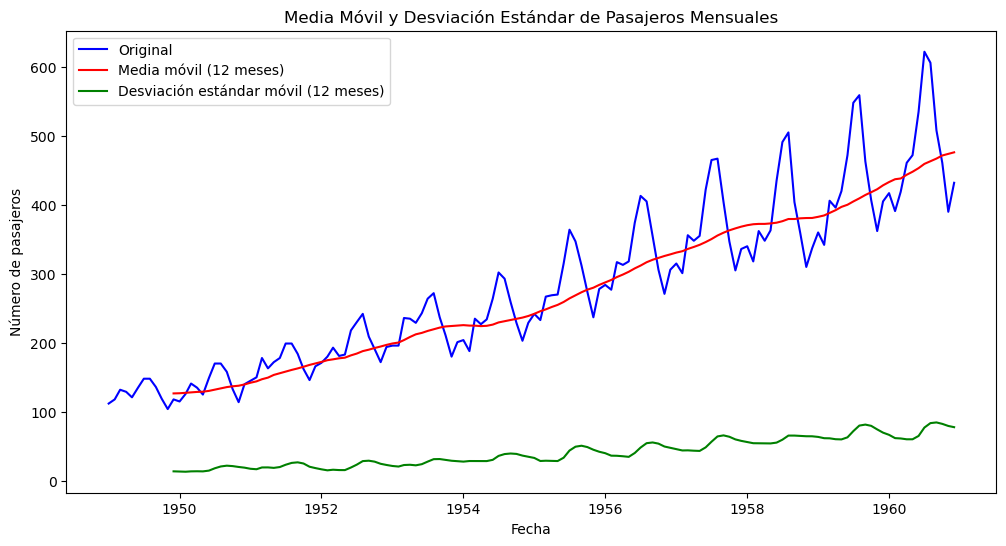

In [18]:
# Importar la biblioteca pandas y matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que 'passengers' ya ha sido definido y contiene los datos
# passengers = pd.read_csv('AirPassengers.csv')
# passengers['Month'] = pd.to_datetime(passengers['Month'], infer_datetime_format=True)
# passengers.set_index('Month', inplace=True)

# Calcular la media móvil de 12 meses
rolmean = passengers.rolling(window=12).mean()

# Calcular la desviación estándar móvil de 12 meses
rolstd = passengers.rolling(window=12).std()

# Graficar la serie original, la media móvil y la desviación estándar móvil
plt.figure(figsize=(12, 6))
plt.plot(passengers, label='Original', color='blue')
plt.plot(rolmean, label='Media móvil (12 meses)', color='red')
plt.plot(rolstd, label='Desviación estándar móvil (12 meses)', color='green')
plt.xlabel('Fecha')
plt.ylabel('Número de pasajeros')
plt.legend(loc='best')
plt.title('Media Móvil y Desviación Estándar de Pasajeros Mensuales')
plt.show()


In [21]:
# Renombrar la columna '#Passengers' a 'Passengers'
passengers.rename({'#Passengers': 'Passengers'}, axis=1, inplace=True)

# Establecer la frecuencia del índice temporal a mensual
passengers.index.freq = 'MS'

# Mostrar las primeras filas del DataFrame
print(passengers.head())

# Mostrar información del DataFrame
print(passengers.info())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None


---------------------------------------------------------------------------------------------------------------------------


. Descomposición de la Serie Temporal:
   - Aplica la descomposición estacional utilizando el modelo especificado (model).
 - Extrae y grafica la tendencia, estacionalidad y residuos junto con la serie temporal original en un gráfico de 4 subplots.

 - Subplot 1: Muestra la serie temporal original.
 - Subplot 2: Representa la tendencia de la serie.
 - Subplot 3: Muestra la componente de estacionalidad junto con su media.
 - Subplot 4: Representa los residuos de la serie junto con su media.



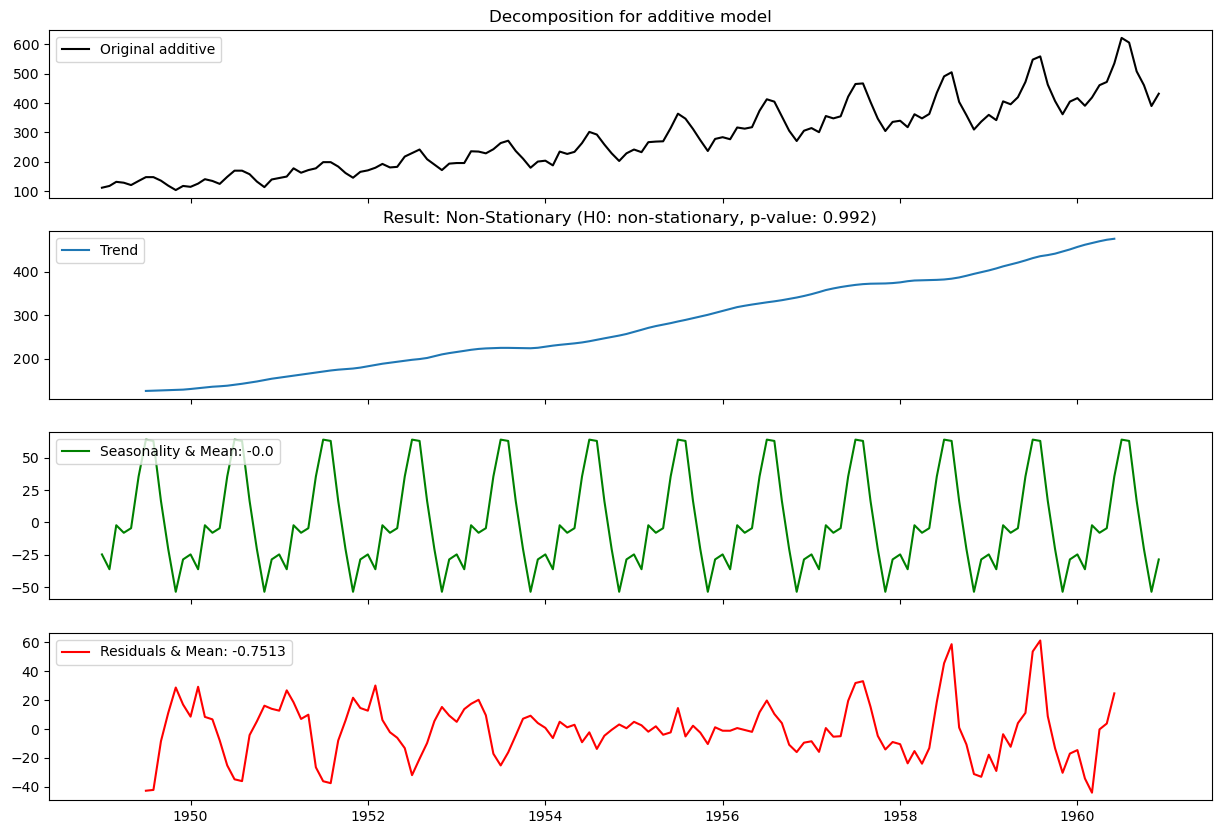

In [23]:
# Definir la función ts_decompose
def ts_decompose(y, model="additive"):
    # Prueba de estacionariedad: Dickey-Fuller
    p_value = sm.tsa.stattools.adfuller(y)[1]
    if p_value < 0.05:
        is_istationary = f"Result: Stationary (H0: non-stationary, p-value: {round(p_value, 3)})"
    else:
        is_istationary = f"Result: Non-Stationary (H0: non-stationary, p-value: {round(p_value, 3)})"
    
    # Descomponer la serie temporal
    result = seasonal_decompose(y, model=model)
    fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    axes[0].set_title("Decomposition for " + model + " model")
    axes[0].plot(y, 'k', label='Original ' + model)
    axes[0].legend(loc='upper left')

    axes[1].set_title(is_istationary)
    axes[1].plot(result.trend, label='Trend')
    axes[1].legend(loc='upper left')

    axes[2].plot(result.seasonal, 'g', label='Seasonality & Mean: ' + str(round(result.seasonal.mean(), 4)))
    axes[2].legend(loc='upper left')

    axes[3].plot(result.resid, 'r', label='Residuals & Mean: ' + str(round(result.resid.mean(), 4)))
    axes[3].legend(loc='upper left')
    plt.show(block=True)

# Aplicar la función ts_decompose al dataset de passengers
ts_decompose(passengers['Passengers'], model="additive")

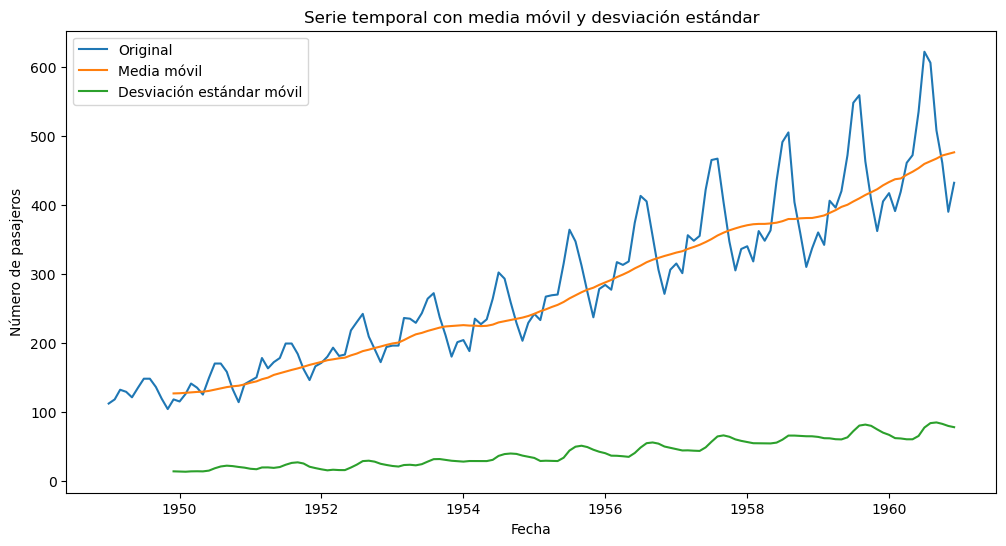

Resultados de la prueba Dickey-Fuller aumentada:
Estadístico               0.8154
p-valor                   0.9919
#Lags usados             13.0000
#Observaciones usadas   130.0000
Valor crítico (1%)       -3.4817
Valor crítico (5%)       -2.8840
Valor crítico (10%)      -2.5788
dtype: float64


In [24]:
# Definir la función test_stationarity
def test_stationarity(timeseries):
    """
    Función para probar la estacionariedad de una serie temporal.

    Args:
        timeseries: La serie temporal que se desea probar.

    Returns:
        None
    """

    # Calcula la media móvil y la desviación estándar móvil de la serie temporal.
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Crea una gráfica de la serie temporal original, la media móvil y la desviación estándar móvil.
    plt.figure(figsize=(12, 6))
    orig = plt.plot(timeseries, label='Original')
    mean = plt.plot(rolmean, label='Media móvil')
    std = plt.plot(rolstd, label='Desviación estándar móvil')

    # Añade una leyenda y un título a la gráfica.
    plt.legend(loc='best')
    plt.title('Serie temporal con media móvil y desviación estándar')
    plt.xlabel('Fecha')
    plt.ylabel('Número de pasajeros')
    plt.show()

    # Realiza la prueba de Dickey-Fuller aumentada
    print('Resultados de la prueba Dickey-Fuller aumentada:')
    dftest = adfuller(timeseries, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Estadístico', 'p-valor', '#Lags usados', '#Observaciones usadas'])
    for key, value in dftest[4].items():
        dfoutput['Valor crítico (%s)' % key] = value

    print(dfoutput)

# Aplicar la función test_stationarity al dataset de passengers
test_stationarity(passengers['Passengers'])

## Resultados de la Prueba Dickey-Fuller Aumentada (ADF)

### Hipótesis

- **Hipótesis Nula (H0)**: La serie temporal es no estacionaria (tiene una raíz unitaria).
- **Hipótesis Alternativa (H1)**: La serie temporal es estacionaria (no tiene una raíz unitaria).

### Resultados Obtenidos

- **Estadístico ADF**: 0.8154
- **p-valor**: 0.9919
- **Número de Lags Usados**: 13
- **Número de Observaciones Usadas**: 130
- **Valores Críticos**:
  - 1%: -3.4817
  - 5%: -2.8840
  - 10%: -2.5788

### Interpretación

El estadístico de la prueba ADF es 0.8154. Este valor es mayor que todos los valores críticos para los niveles de significancia del 1%, 5% y 10%, lo que indica que no podemos rechazar la hipótesis nula de que la serie tiene una raíz unitaria.

El p-valor asociado es 0.9919, que es significativamente mayor que cualquier nivel típico de significancia (0.01, 0.05 o 0.10). Este p-valor alto refuerza la conclusión de que no se puede rechazar la hipótesis nula.

### Conclusión

Dado que el estadístico ADF es mayor que los valores críticos y el p-valor es muy alto, **no se puede rechazar la hipótesis nula** de que la serie temporal de pasajeros es no estacionaria. Esto sugiere que la serie tiene una tendencia o dependencia temporal y no es adecuada para ciertos análisis y modelados estadísticos sin una transformación adicional que la haga estacionaria.


-----------------------------------------------------------------------------------------------------------------------------

In [25]:
import numpy as np


In [26]:
air_passengers_data_log_scaled = np.log(passengers)

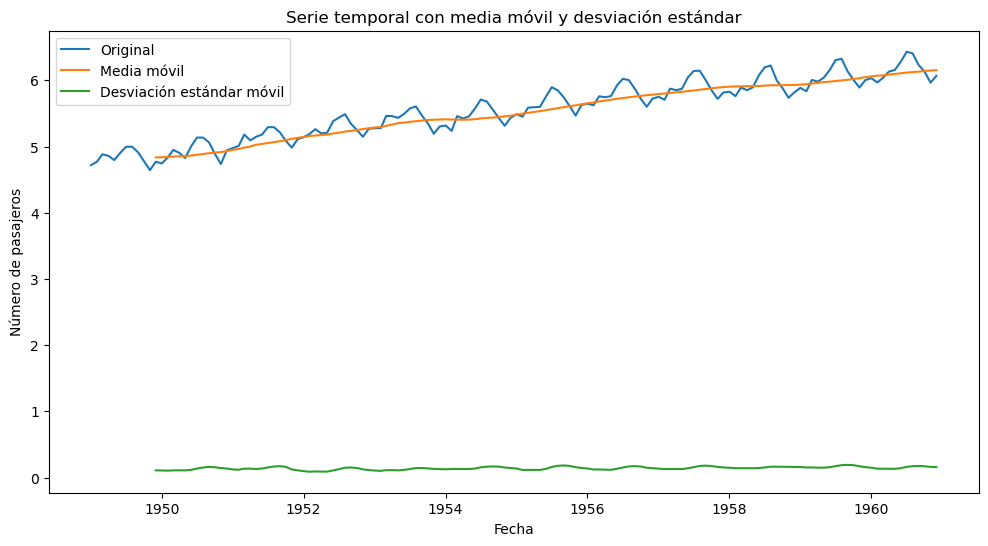

Resultados de la prueba Dickey-Fuller aumentada:
Estadístico              -1.7170
p-valor                   0.4224
#Lags usados             13.0000
#Observaciones usadas   130.0000
Valor crítico (1%)       -3.4817
Valor crítico (5%)       -2.8840
Valor crítico (10%)      -2.5788
dtype: float64


In [27]:
test_stationarity(air_passengers_data_log_scaled)

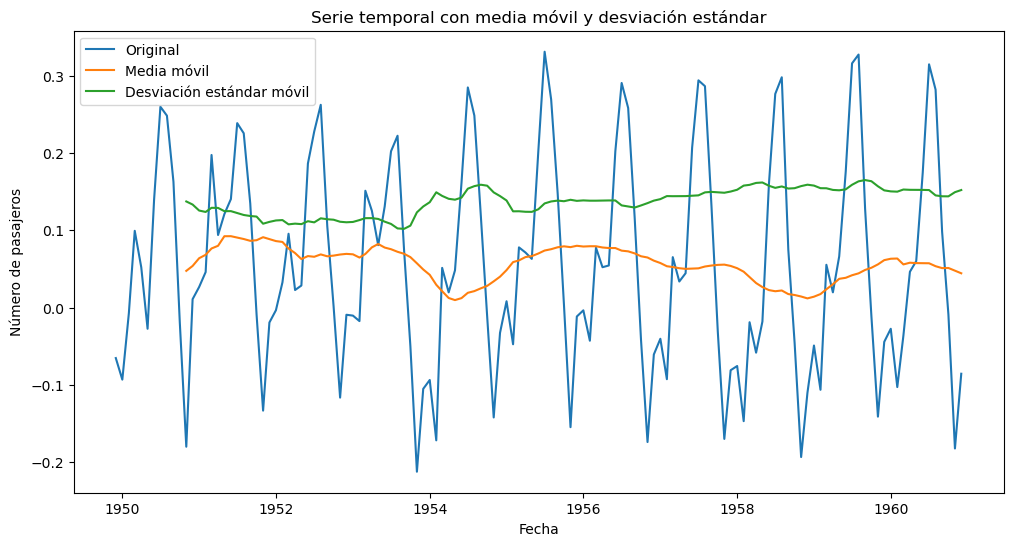

Resultados de la prueba Dickey-Fuller aumentada:
Estadístico              -3.1629
p-valor                   0.0222
#Lags usados             13.0000
#Observaciones usadas   119.0000
Valor crítico (1%)       -3.4865
Valor crítico (5%)       -2.8862
Valor crítico (10%)      -2.5799
dtype: float64


In [28]:
ma = air_passengers_data_log_scaled.rolling(window=12).mean()
air_passengers_data_log_scaled_minus_ma = air_passengers_data_log_scaled - ma


air_passengers_data_log_scaled_minus_ma.dropna(inplace=True)
test_stationarity(air_passengers_data_log_scaled_minus_ma)

In [29]:
air_passengers_data_log_scaled_ma = air_passengers_data_log_scaled + ma

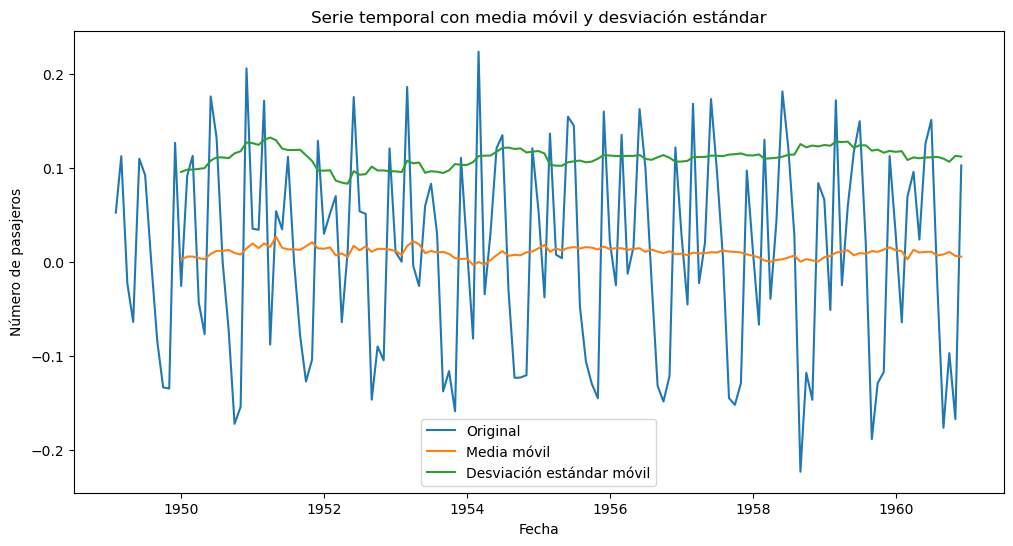

Resultados de la prueba Dickey-Fuller aumentada:
Estadístico              -2.7171
p-valor                   0.0711
#Lags usados             14.0000
#Observaciones usadas   128.0000
Valor crítico (1%)       -3.4825
Valor crítico (5%)       -2.8844
Valor crítico (10%)      -2.5790
dtype: float64


In [30]:
air_passengers_data_log_scaled_ps = air_passengers_data_log_scaled.diff(periods = 1)
air_passengers_data_log_scaled_ps.dropna(inplace = True )
test_stationarity(air_passengers_data_log_scaled_ps)

<Figure size 640x480 with 0 Axes>

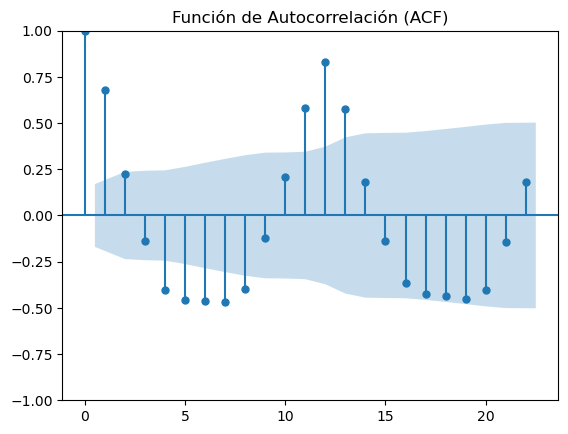

<Figure size 640x480 with 0 Axes>

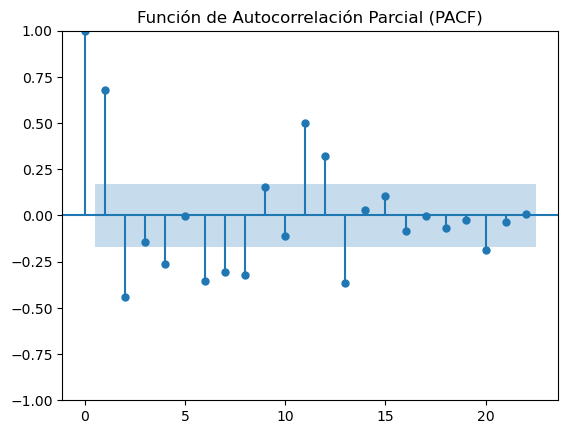

In [31]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Cálculo del ACF y PACF con 20 rezagos (lags)
# `nlags` se utiliza para definir el número de rezagos a calcular
# `air_passengers_data_log_scaled_minus_ma` es la serie de tiempo a analizar
lag_acf = acf(air_passengers_data_log_scaled_minus_ma)
lag_pacf = pacf(air_passengers_data_log_scaled_minus_ma)

# Graficar la función de autocorrelación (ACF)
plt.figure()
plot_acf(air_passengers_data_log_scaled_minus_ma)
plt.title("Función de Autocorrelación (ACF)")
plt.show()

# Graficar la función de autocorrelación parcial (PACF)
plt.figure()
plot_pacf(air_passengers_data_log_scaled_minus_ma)
plt.title("Función de Autocorrelación Parcial (PACF)")
plt.show()

In [122]:
order = (10, 2, 2)

In [123]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Suponiendo que 'air_passengers_data_log_scaled_minus_ma' es tu serie temporal
air_passengers_data_log_scaled_minus_ma.dropna(inplace=True)

# Dividir los datos en entrenamiento y prueba
train, test = train_test_split(air_passengers_data_log_scaled_minus_ma, test_size=0.10, shuffle=False)

# Ajustar el modelo ARIMA
# El orden (p, d, q) se define como (1, 2, 2) en tu caso
#order = (1, 2, 2)
model = ARIMA(train, order=order)
model_fit = model.fit()

# Imprimir un resumen del modelo ajustado
print(model_fit.summary())

# Predicciones
start_date = '1959-10-01'
end_date = '1960-12-01'
predictions = model_fit.predict(start=start_date, end=end_date)

# Imprimir las predicciones
print(predictions)

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  119
Model:                ARIMA(10, 2, 2)   Log Likelihood                 173.324
Date:                Wed, 19 Jun 2024   AIC                           -320.649
Time:                        20:50:19   BIC                           -284.741
Sample:                    12-01-1949   HQIC                          -306.070
                         - 10-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0293      0.075     -0.389      0.698      -0.177       0.119
ar.L2         -0.7610      0.068    -11.125      0.000      -0.895      -0.627
ar.L3         -0.1901      0.073     -2.620      0.0

<Axes: ylabel='Density'>

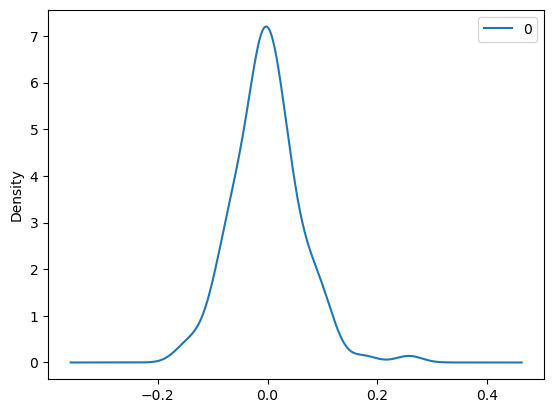

In [124]:
import pandas as pd

# Create a DataFrame of residuals
residual = pd.DataFrame(model_fit.resid)

# Plot the residuals as a kernel density estimate (KDE)
residual.plot(kind="kde")


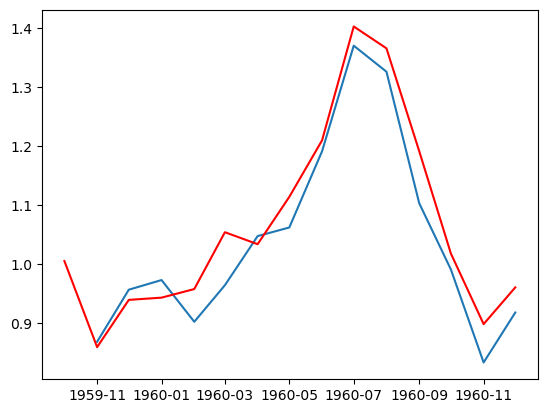

In [125]:
predict = np.exp(predictions)

test_set = np.exp(test)

plt.plot(test_set)
plt.plot(predict, color='red')
plt.show()

In [72]:

test.tail()

,Passengers
Month,
1960-08-01,0.2824
1960-09-01,0.0982
1960-10-01,-0.0092
1960-11-01,-0.1827
1960-12-01,-0.0858


In [73]:
test.head()

,Passengers
Month,
1959-11-01,-0.1414
1959-12-01,-0.0445
1960-01-01,-0.0275
1960-02-01,-0.1031
1960-03-01,-0.0365


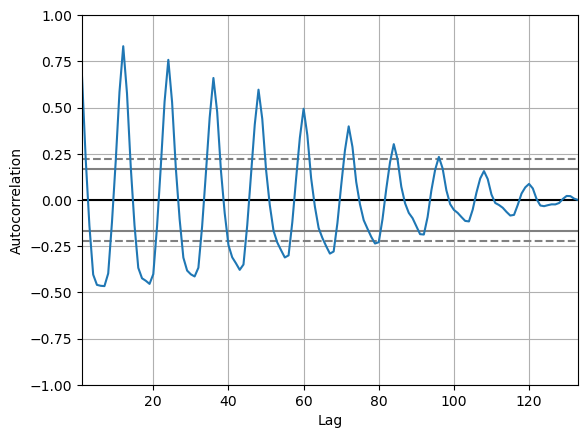

In [74]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(air_passengers_data_log_scaled_minus_ma)
plt.show()


In [75]:
import numpy as np

# Función para calcular el Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Ejemplo de cómo usarlo con tus datos
mape = mean_absolute_percentage_error(test, predictions)
print('Test MAPE: %.3f' % mape)

Test MAPE: 265.875


In [76]:
import numpy as np

# Función para calcular el Mean Absolute Deviation (MAD)
def mean_absolute_deviation(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred))

# Ejemplo de cómo usarlo con tus datos
mad = mean_absolute_deviation(test, predictions)
print('Mean Absolute Deviation (MAD): %.3f' % mad)


Mean Absolute Deviation (MAD): 0.161


In [77]:
# Predicciones
start_date = '1959-10-01'
end_date = '1960-12-01'
predictions = model_fit.predict(start=start_date, end=end_date)

In [127]:
# Calcular los residuos (errores del modelo)
#residuals = test - predictions

# Calcular la desviación estándar de los residuos
#std_deviation = np.std(residuals)

# Mostrar la desviación estándar de los residuos
#print(f'Desviación estándar de los residuos: {std_deviation:.4f}')






In [112]:
# Definir el primer modelo ARIMA con el orden (15, 2, 2)
#order1 = (20, 2, 2)
#model1 = ARIMA(train, order=order1)
#model_fit1 = model1.fit()

# Generar predicciones para el primer modelo
#start_date = '1959-10-01'
#end_date = '1960-12-01'
#predictions1 = model_fit1.predict(start=start_date, end=end_date)


In [113]:
# Definir el segundo modelo ARIMA con el orden (2, 1, 2) por ejemplo
#order2 = (15,2, 2)
#model2 = ARIMA(train, order=order2)
#model_fit2 = model2.fit()

# Generar predicciones para el segundo modelo
#predictions2 = model_fit2.predict(start=start_date, end=end_date)


In [131]:
# Imprimir los resúmenes de ambos modelos
#print("\nModelo 1: Orden (20, 2, 2)")
#print(model_fit1.summary())


# Evaluar el rendimiento del primer modelo
#rmse1 = np.sqrt(mean_squared_error(test, predictions1))
#print("\nRMSE del Modelo 1:", rmse1)



In [130]:

#print("\nModelo 2: Orden (15, 2, 2)")
#print(model_fit2.summary())



# Evaluar el rendimiento del segundo modelo
#rmse2 = np.sqrt(mean_squared_error(test, predictions2))
#print("RMSE del Modelo 2:", rmse2)

In [116]:
#print(len(test))
#print(len(predictions1))




15
15


In [117]:
# Crear modelos ARIMA de ejemplo
# Ajustar dos modelos ARIMA (esto es solo un ejemplo, tus modelos pueden ser diferentes)
#model1 = ARIMA(test, order=(15, 2, 2))
#model_fit1 = model1.fit()

#model2 = ARIMA(test, order=(1, 1, 1))
#model_fit2 = model2.fit()

In [118]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#from statsmodels.tsa.arima.model import ARIMA

# Supongamos que ya tienes los datos y los modelos ajustados.
# Crear datos de ejemplo:
#dates_test = pd.date_range(start="2023-01-01", periods=14, freq="D")
#test = pd.Series(np.random.randn(14), index=dates_test)



viendo las dos series




In [129]:
# Definir el rango de fechas específico
#start_date = '1959-10-01'
#end_date = '1960-12-01'

# Generar un rango de fechas desde start_date hasta end_date
#dates_test = pd.date_range(start=start_date, end=end_date, freq="MS")  # MS es frecuencia de inicio de mes


In [128]:


# Crear una serie de prueba con datos de ejemplo
#test = pd.Series(np.random.randn(len(dates_test)), index=dates_test)

# Crear modelos ARIMA
# Ajustar dos modelos ARIMA (esto es solo un ejemplo, tus modelos pueden ser diferentes)
#model1 = ARIMA(test, order=(15, 2, 2))
#model_fit1 = model1.fit()

#model2 = ARIMA(test, order=(1, 1, 1))
#model_fit2 = model2.fit()

# Realizar las predicciones
#predictions1 = model_fit1.predict(start=0, end=len(test)-1, dynamic=False)
#predictions2 = model_fit2.predict(start=0, end=len(test)-1, dynamic=False)

# Aplicar la transformación np.exp a las predicciones y al conjunto de prueba
#test_set = np.exp(test)
#predict1 = np.exp(predictions1)
predict2 = np.exp(predictions2)

# Graficar los resultados
#plt.figure(figsize=(14, 7))

# Gráfica de los valores reales
#plt.plot(test_set, label='Actual')

# Gráfica de las predicciones del modelo 1
#plt.plot(test.index, predict1, color='red', label='Predicted (20, 2, 2)')

# Gráfica de las predicciones del modelo 2
#plt.plot(test.index, predict2, color='green', label='Predicted (15, 2,2 )')
2
# Título y leyenda
#plt.title("Comparación de Predicciones de Modelos ARIMA")
#plt.legend()

# Mostrar la gráfica
#plt.show()


2

In [135]:
# Predicciones
start_date = '1959-10-01'
end_date = '1960-12-01'
#predictions = model_fit.predict(start=start_date, end=end_date)

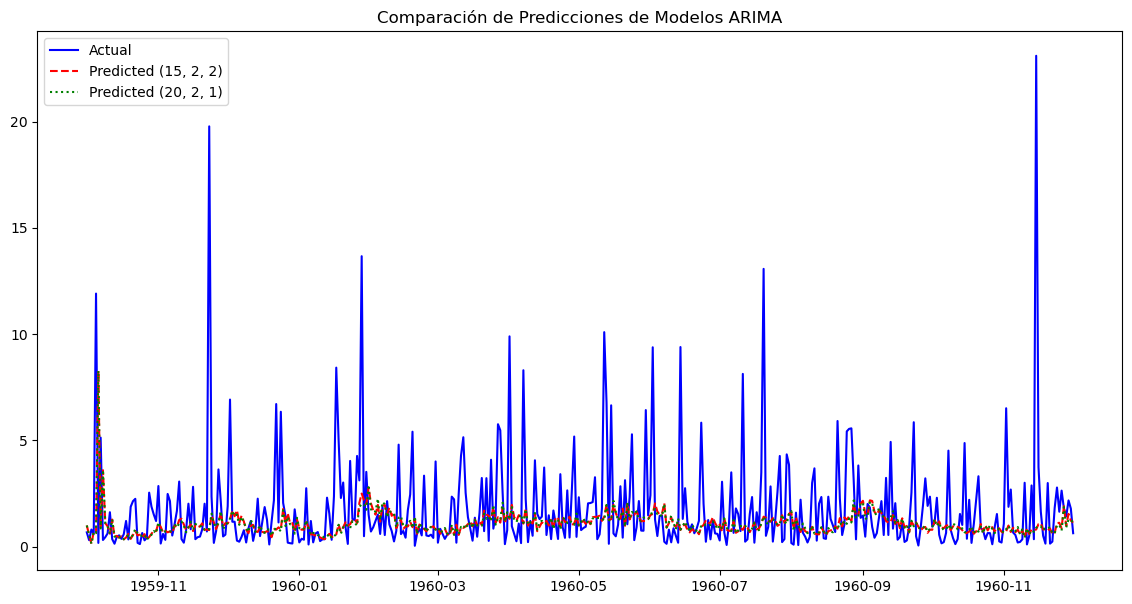

In [137]:
dates_test = pd.date_range(start=start_date, end=end_date) #, freq="MS" # MS es frecuencia de inicio de mes


# Crear una serie de prueba con datos de ejemplo
test = pd.Series(np.random.randn(len(dates_test)), index=dates_test)
#dates_test = pd.date_range(start='2022-01-01', periods=100, freq='D')
test = pd.Series(np.random.randn(len(dates_test)), index=dates_test)

# Ajustar el primer modelo ARIMA (ejemplo: ARIMA(15, 2, 2))
model1 = ARIMA(test, order=(15, 2, 2))
model_fit1 = model1.fit()

# Ajustar el segundo modelo ARIMA (ejemplo: ARIMA(20, 2, 2))
model2 = ARIMA(test, order=(20, 2, 2))
model_fit2 = model2.fit()

# Realizar las predicciones
predictions1 = model_fit1.predict(start=0, end=len(test)-1, dynamic=False)
predictions2 = model_fit2.predict(start=0, end=len(test)-1, dynamic=False)

# Aplicar la transformación np.exp a las predicciones y al conjunto de prueba
test_set = np.exp(test)
predict1 = np.exp(predictions1)
predict2 = np.exp(predictions2)

# Graficar los resultados
plt.figure(figsize=(14, 7))

# Gráfica de los valores reales
plt.plot(test_set, label='Actual', color='blue')

# Gráfica de las predicciones del modelo 1
plt.plot(test.index, predict1, color='red', linestyle='dashed', label='Predicted (15, 2, 2)')

# Gráfica de las predicciones del modelo 2
plt.plot(test.index, predict2, color='green', linestyle='dotted', label='Predicted (20, 2, 1)')

# Título y leyenda
plt.title("Comparación de Predicciones de Modelos ARIMA")
plt.legend()

# Mostrar la gráfica
plt.show()


--------------------------------------------------------------------------------------------------------------------------------

### Metodo winters de Pronostico